# Getting Into Shape: Array Shapes and Axes

Now that you’ve seen some of what NumPy can do, it’s time to firm up that foundation with some important theory. There are a few concepts that are important to keep in mind, especially as you work with arrays in higher dimensions.

**Vectors**, which are one-dimensional arrays of numbers, are the least complicated to keep track of. Two dimensions aren’t too bad, either, because they’re similar to spreadsheets. But things start to get tricky at three dimensions, and visualizing four? Forget about it.

## Mastering Shape

Shape is a key concept when you’re using multidimensional arrays. At a certain point, it’s easier to forget about visualizing the shape of your data and to instead follow some mental rules and trust NumPy to tell you the correct shape.

All arrays have a property called `.shape` that returns a tuple of the size in each dimension. It’s less important which dimension is which, but it’s critical that the arrays you pass to functions are in the shape that the functions expect. A common way to confirm that your data has the proper shape is to print the data and its shape until you’re sure everything is working like you expect.

This next example will show this process. You’ll create an array with a complex shape, check it, and reorder it to look like it’s supposed to:

In [8]:
import numpy as np

temperatures = np.array([
    29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
    12.6, 49.9, 38.6, 31.3, 9.2, 22.2,
    29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
    12.6, 49.9, 38.6, 31.3, 9.2, 22.2
]).reshape(2, 3, 4)

temperatures.shape

(2, 3, 4)

In [9]:
temperatures

array([[[29.3, 42.1, 18.8, 16.1],
        [38. , 12.5, 12.6, 49.9],
        [38.6, 31.3,  9.2, 22.2]],

       [[29.3, 42.1, 18.8, 16.1],
        [38. , 12.5, 12.6, 49.9],
        [38.6, 31.3,  9.2, 22.2]]])

In [10]:
np.swapaxes(temperatures, 1, 2)

array([[[29.3, 38. , 38.6],
        [42.1, 12.5, 31.3],
        [18.8, 12.6,  9.2],
        [16.1, 49.9, 22.2]],

       [[29.3, 38. , 38.6],
        [42.1, 12.5, 31.3],
        [18.8, 12.6,  9.2],
        [16.1, 49.9, 22.2]]])

Here, you use a numpy.ndarray method called `.reshape()` to form a `2 × 2 × 3` block of data. When you check the shape of your array in input 3, it’s exactly what you told it to be. However, you can see how printed arrays quickly become hard to visualize in three or more dimensions. After you swap axes with `.swapaxes()`, it becomes little clearer which dimension is which. You’ll see more about axes in the next section.

Shape will come up again in the section on broadcasting. For now, just keep in mind that these little checks don’t cost anything. You can always delete the cells or get rid of the code once things are running smoothly.

## Understanding Axes

The example above shows how important it is to know not only what shape your data is in but also which data is in which **axis**. In NumPy arrays, axes are zero-indexed and identify which dimension is which. For example, a two-dimensional array has a vertical axis (axis 0) and a horizontal axis (axis 1). Lots of functions and commands in NumPy change their behavior based on which axis you tell them to process.

This example will show how `.max()` behaves by default, with no `axis` argument, and how it changes functionality depending on which axis you specify when you do supply an argument:

In [2]:
import numpy as np

table = np.array([
    [5, 3, 7, 1, 2],
    [2, 6, 7 , 9 ,3],
    [1, 1, 1, 1, 8],
    [4, 3, 2, 0, 10],
])

In [3]:
table

array([[ 5,  3,  7,  1,  2],
       [ 2,  6,  7,  9,  3],
       [ 1,  1,  1,  1,  8],
       [ 4,  3,  2,  0, 10]])

In [4]:
table.flatten()

array([ 5,  3,  7,  1,  2,  2,  6,  7,  9,  3,  1,  1,  1,  1,  8,  4,  3,
        2,  0, 10])

In [5]:
table.shape

(4, 5)

In [6]:
table.max()

10

In [19]:
table.max(axis=0)

array([ 5,  6,  7,  9, 10])

In [20]:
table.max(axis=1)

array([ 7,  9,  8, 10])

By default, `.max()` returns the largest value in the entire array, no matter how many dimensions there are. However, once you specify an axis, it performs that calculation for each set of values along that particular axis. For example, with an argument of `axis=0`, `.max() `selects the maximum value in each of the four vertical sets of values in table and returns an array that has been **flattened**, or aggregated into a one-dimensional array.

In fact, many of NumPy’s functions behave this way: If no axis is specified, then they perform an operation on the entire dataset. Otherwise, they perform the operation in an **axis-wise** fashion.

### Reshaping Arrays

Another important concept here is to reshape your NumPy Arrays, especially when you are dealing with multidimensional arrays. It's common for you to create a NumPy Array in just one dimension, reshaping it to a multidimension later, or vice versa. A key idea here is that you can change the shape of your arrays, but the number of elements should not be changed; for example, you can't reshape a `3x3` array to a `10x1` array. The total number of elements (or a so-called data buffer in the ndarray internal organization) should be consistent before and after reshaping. Or ,you might need to resize, but that's another story. Now, let's look at some shape manipulations:

In [26]:
x = np.arange(24)

In [27]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [28]:
x.shape = 2, 3, -1

In [29]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [30]:
x.strides

(96, 32, 8)

The basic reshaping technique changes the `numpy.shape` attribute. In the preceding example, we have an array whose shape is `(24, 1)`, and after altering the shape attribute, we obtain an array of the same size but the shape has been changed to `2x3x4`. Note that `-1` in a shape means the remaining shape size of the transferred array.

The following example is to reshape a `100x100x100` array back to just one dimension; here, we apply two functions, `numpy.flatten()` and `numpy.ravel()`, to collapse the array, and at the same time, we also compare the execution time. We notice that the speed difference between `numpy.flatten()` and `numpy.ravel()` is huge, but both of them are much faster than three layers of Python looping. The difference in performance between the two functions is that `np.flatten()` creates a copy from the original array, while `np.ravel()` just changes the view (if you don't remember the difference between copies and views, go back a bit to previous sections on how numpy manages memory section).

In [52]:
x = np.arange(1000000)

In [53]:
x.shape = 100, 100, 100

In [40]:
%timeit x.flatten() 

462 ns ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
%timeit x.ravel()

142 ns ± 3.36 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


This example simply shows you that NumPy offers many functions and some of them can produce same results; pick up the function that satisfies your purpose and, at the same time, provides you with optimized performance.

## Broadcasting

NumPy operations are mostly done element-wise, which requires two arrays in an operation to have the same shape; however, this doesn't mean that NumPy operations can't take two differently shaped arrays (refer to the first example we looked at with scalars). NumPy provides the flexibility to broadcast a smaller-sized array across a larger one. But we can't broadcast the array to just about any shape. It needs to follow certain constrains; we will be covering them in this section. One key idea to keep in mind is that broadcasting involves performing meaningful operations over two differently shaped arrays. However, inappropriate broadcasting might lead to an inefficient use of memory that slows down computation.

### Broadcasting rules

The general rule for broadcasting is to determine whether two arrays are compatible with dimensioning. There are two conditions that need to be met:

- Two arrays should be of equal dimensions
- One of them is 1

If the preceding conditions are not met, a ValueError exception will be thrown to indicate that the arrays have incompatible shapes. Now, we are going through three examples to take a look at how broadcasting rules work:

In [11]:
x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20]]) 

In [13]:
x

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20]])

In [60]:
y = np.array([1, 2, 3]) 

In [61]:
y

array([1, 2, 3])

In [62]:
x + y

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])

Let's make the preceding code into a graph to help us understand broadcasting. The `x` variable has a shape of `(3, 3)`, while `y` only has a shape of `3`. But in NumPy broadcasting, the shape of `y` is translated to `3` by `1`; therefore, the second condition of the rule has been met. `y` has been broadcast to the same shape of `x` by repeating it. The `+` operation can apply element-wise.

<img src="../images/broadcasting-1.png" alt="broadcasting-1" width=500 align="left" />

Next, we are going to show you the result of broadcasting both arrays:

In [64]:
x = np.array([[0], [10], [20]]) 

In [66]:
x.shape, y.shape

((3, 1), (3,))

In [67]:
x + y

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])

The preceding example shows you how both `x` and `y` are broadcast. `x` is broadcast by the column, while `y` is broadcast by the row since both of them have dimension that are equal to 1 in terms of their shape. The second broadcasting condition has been met, and the new result array is a `3` by `3` array.

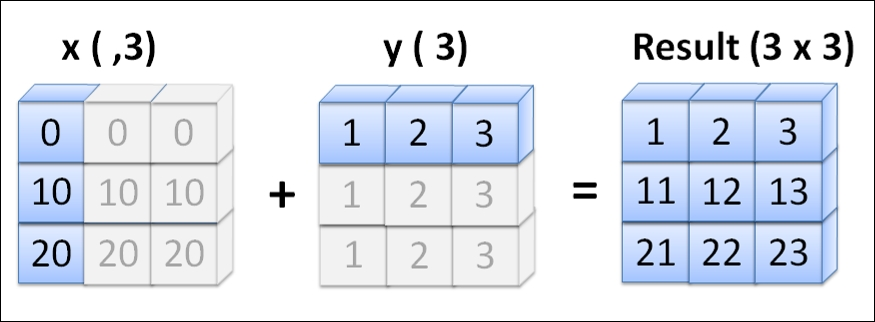<img src="../images/broadcasting-2.jpg" alt="broadcasting-2" width=500 align="left" />

Let's take a look of our last example, which two arrays can't meet the requirement of broadcasting rules:

In [14]:
x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20]])

In [15]:
y = np.arange(1, 5) 

In [16]:
x + y

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

In [21]:
 try:
     x = int('javad')
 except ValueError:
     print("Oops!  That was no valid number.  Try again...")

Oops!  That was no valid number.  Try again...


In the third example, broadcasting can't be performed due to `x` and `y` as they have different shapes in the row dimension and none of them are equal to `1`. Thus, none of the broadcasting conditions can be met. NumPy throws `ValueError`, telling you that the shape is incompatible.

<img src="../images/broadcasting-3.jpg" alt="broadcasting-3" width=500 align="left" />

Understanding broadcasting is an important part of mastering vectorized calculations, and vectorized calculations are the way to write clean, idiomatic NumPy code.